Seaborn 巧妙的語法和易用性,我們只用3個函數就可以創建普通的圖表。

- Catplot:用於創建分類圖
- Relplot:用於創建關係圖
- Displot:用於創建分佈圖

Plotting with categorical data: https://seaborn.pydata.org/tutorial/categorical.html

In [1]:
import pandas as pd
import seaborn as sns

credit = pd.read_csv('input/credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,19.225,1433,122,3,38,14,Female,No,No,Caucasian,0
1,43.540,2906,232,4,69,11,Male,No,No,Caucasian,0
2,55.367,6340,448,1,33,15,Male,No,Yes,Caucasian,815
3,11.741,2271,182,4,59,12,Female,No,No,Asian,0
4,15.560,4307,352,4,57,8,Male,No,Yes,African American,579


### 1.sns.catplot :用於創建分類圖

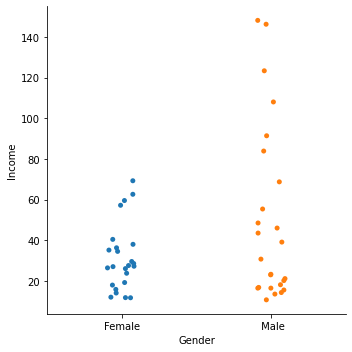

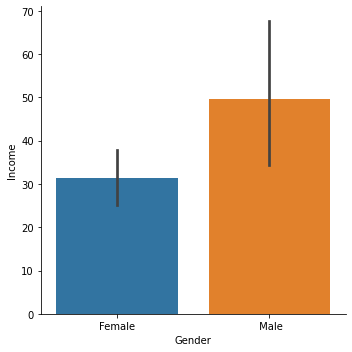

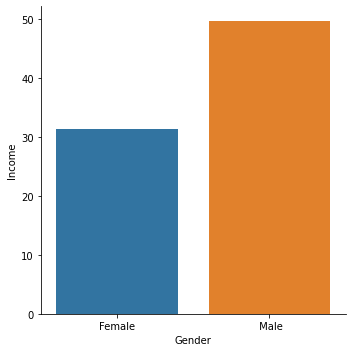

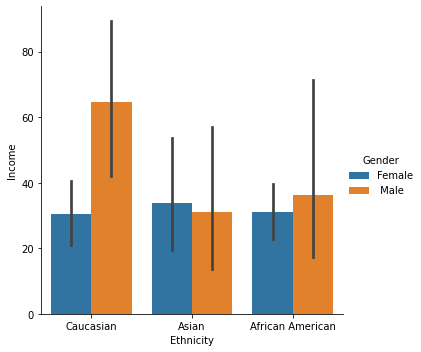

In [35]:
sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'strip')           # strip plot defult
sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'bar')             # bar plot
sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'bar', ci  =False) # Confidence interval (信賴區間)
sns.catplot(x = 'Ethnicity',y ='Income', data = credit, kind = 'bar', hue = 'Gender')

We can also use **box plots** for a categorical variable to provide additional statistics using the argument **(kind = 'box')**:  

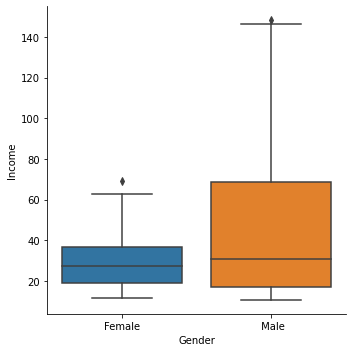

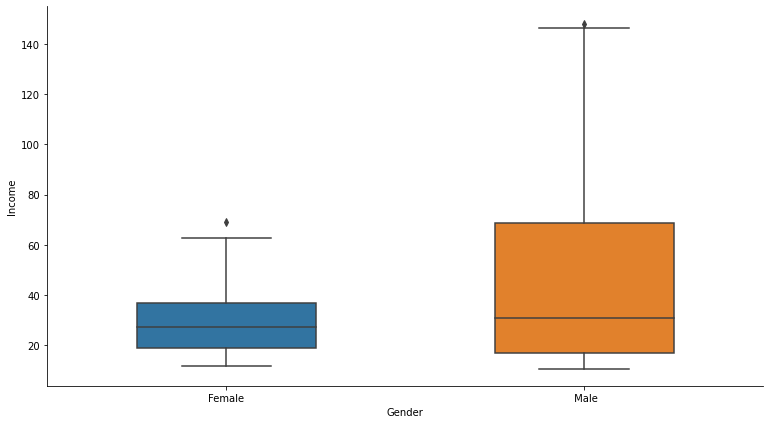

In [29]:
sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'box')
sns.catplot(x = 'Gender', y =  'Income', data = credit, kind = 'box',height=6, aspect=1.8, width=0.5)

### 2.sns.regplot() :用於創建關係圖

In [70]:
import pandas as pd
import seaborn as sns

boston = pd.read_csv('input/boston.csv')
boston.head()

,crim,nox,rm,age,tax,medv
0,0.00632,0.538,6.575,65.2,296,24.0
1,0.02731,0.469,6.421,78.9,242,21.6
2,0.02729,0.469,7.185,61.1,242,34.7
3,0.03237,0.458,6.998,45.8,222,33.4
4,0.06905,0.458,7.147,54.2,222,36.2


<AxesSubplot:xlabel='medv', ylabel='crim'>

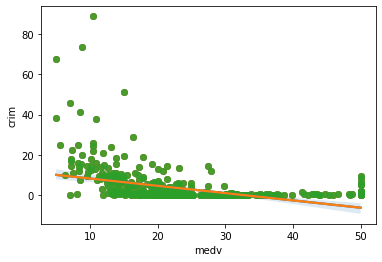

In [38]:
sns.regplot(x= 'medv', y= 'crim', data = boston)                              # defult kind = scatter
sns.regplot(x= 'medv', y= 'crim', data = boston, ci = False)
sns.regplot(x= 'medv', y= 'crim', data = boston, ci = False, fit_reg = False) #remove thre regression line

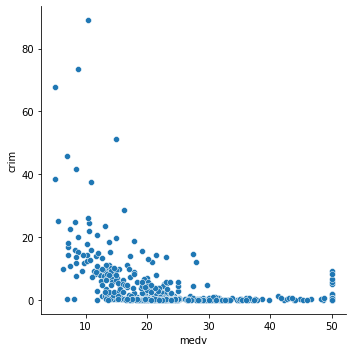

In [39]:
sns.relplot(x= 'medv', y= 'crim', data = boston, kind='scatter')

### 3.sns.displot() :用於創建分佈圖

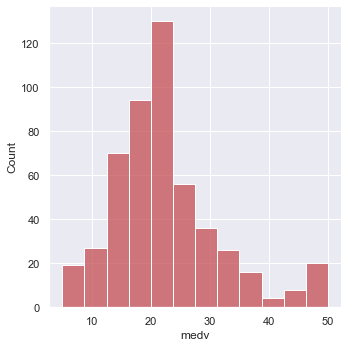

In [72]:
sns.displot(boston['medv'], bins=12, color='r')

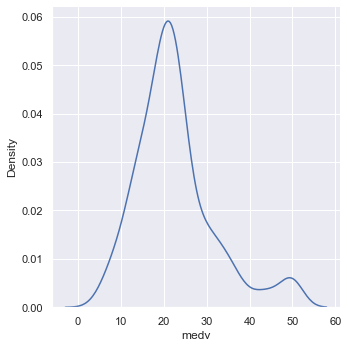

In [74]:
sns.displot(boston['medv'], kind = 'kde', color='b')

## Example

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style='darkgrid')
df = pd.read_csv('input/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


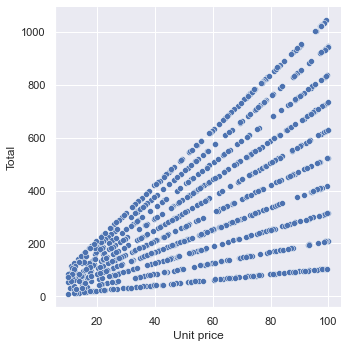

In [53]:
sns.relplot(data=df, x='Unit price', y='Total', kind='scatter')

In [56]:
df_sub = df[['Total','Date']].groupby('Date').sum().reset_index()
df_sub.head()

,Date,Total
0,1/1/2019,4745.1810
1,1/10/2019,3560.9490
2,1/11/2019,2114.9625
3,1/12/2019,5184.7635
4,1/13/2019,2451.2040


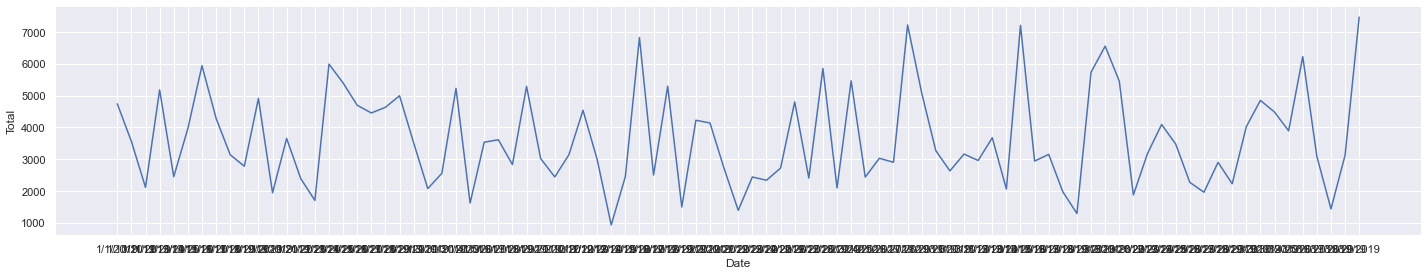

In [59]:
sns.relplot(data=df_sub, x='Date', y='Total', kind='line',height=4, aspect=5)

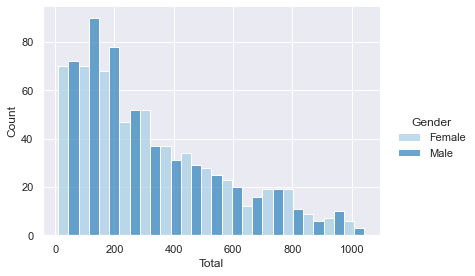

In [60]:
sns.displot(data=df, x='Total', hue='Gender', kind='hist',
             multiple='dodge', palette='Blues', height=4, aspect=1.4)

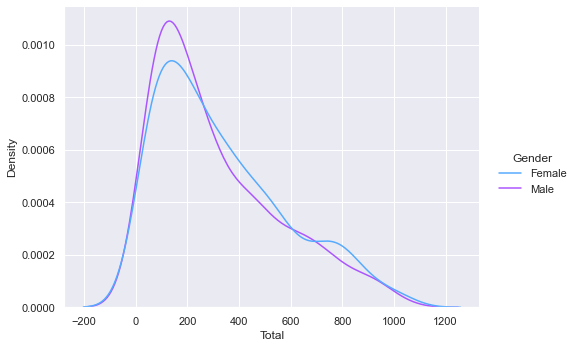

In [61]:
sns.displot(data=df, x='Total', hue='Gender', kind='kde',
             palette='cool', height=5, aspect=1.4)

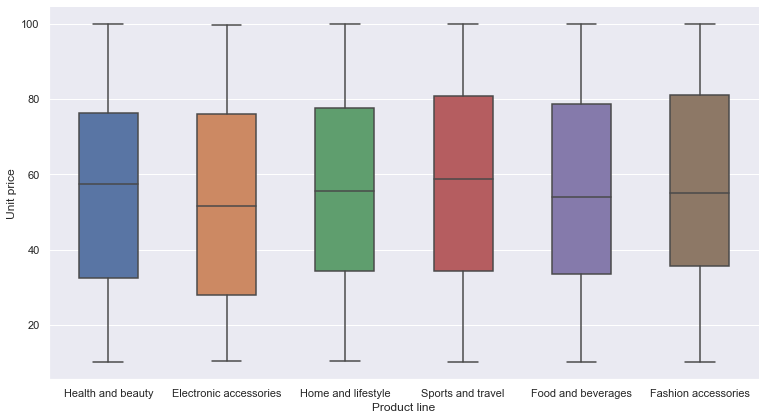

In [65]:
sns.catplot(data=df, x='Product line', y='Unit price', kind='box',
             height=6, aspect=1.8, width=0.5)

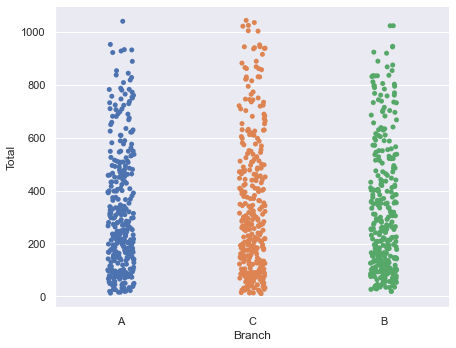

In [66]:
sns.catplot(data=df, x='Branch', y='Total', kind='strip',
             height=5, aspect=1.3)

In [68]:
df[['Branch','Total']].groupby('Branch').mean()       

,Total
Branch,
A,312.354031
B,319.872506
C,337.099715


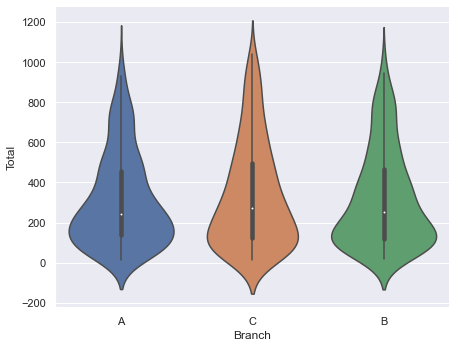

In [69]:
sns.catplot(data=df, x='Branch', y='Total', kind='violin',
            height=5, aspect=1.3)

## 4. pairplot

Using **seaborn**, we can create a matrix of scatter plots among all columns using the function **sns.pairplot()**: 

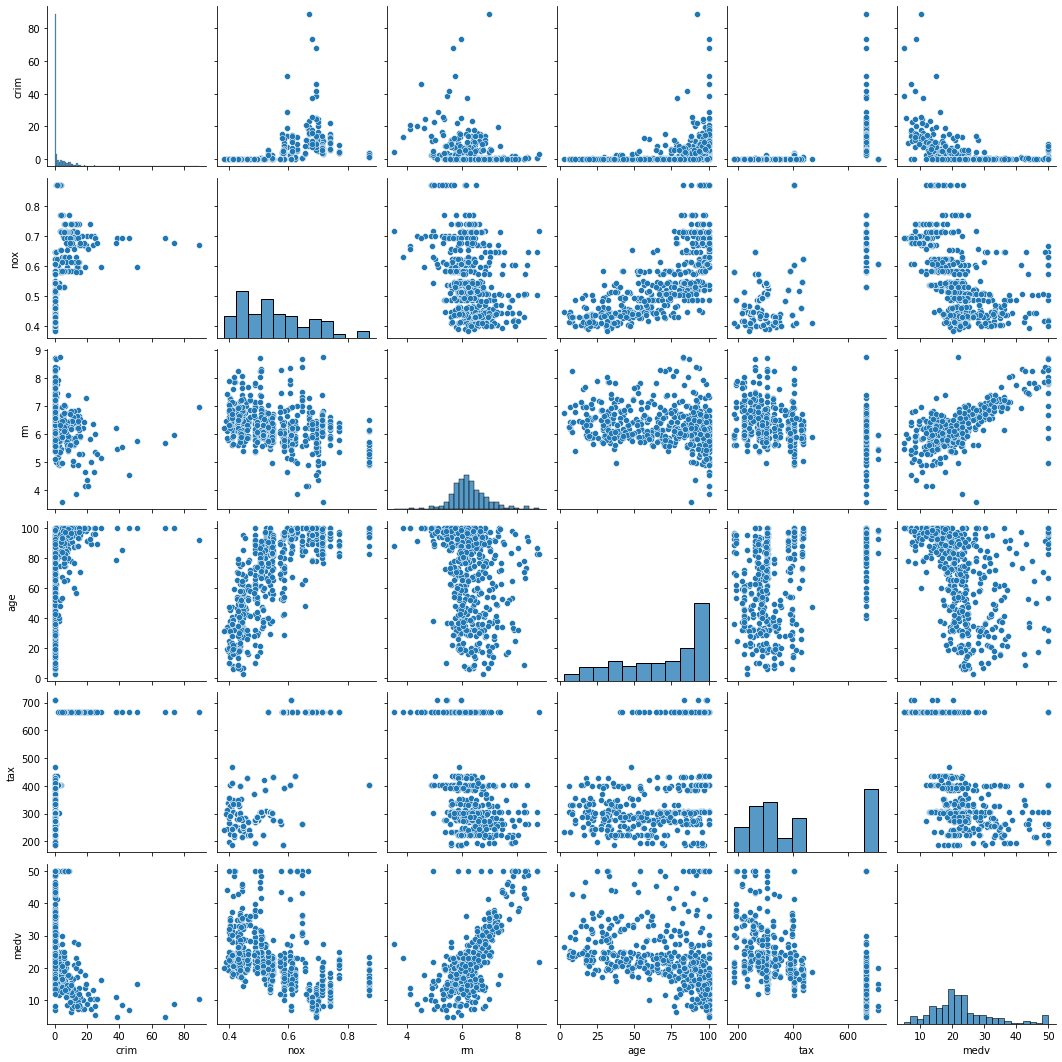

In [22]:
sns.pairplot(boston)

It is usuall among analysts  to replace the **histograms** in the diagonal plots in the scatter plot matrix with **density plots**, and we do it using the argument **diag_kind = 'kde'**: 

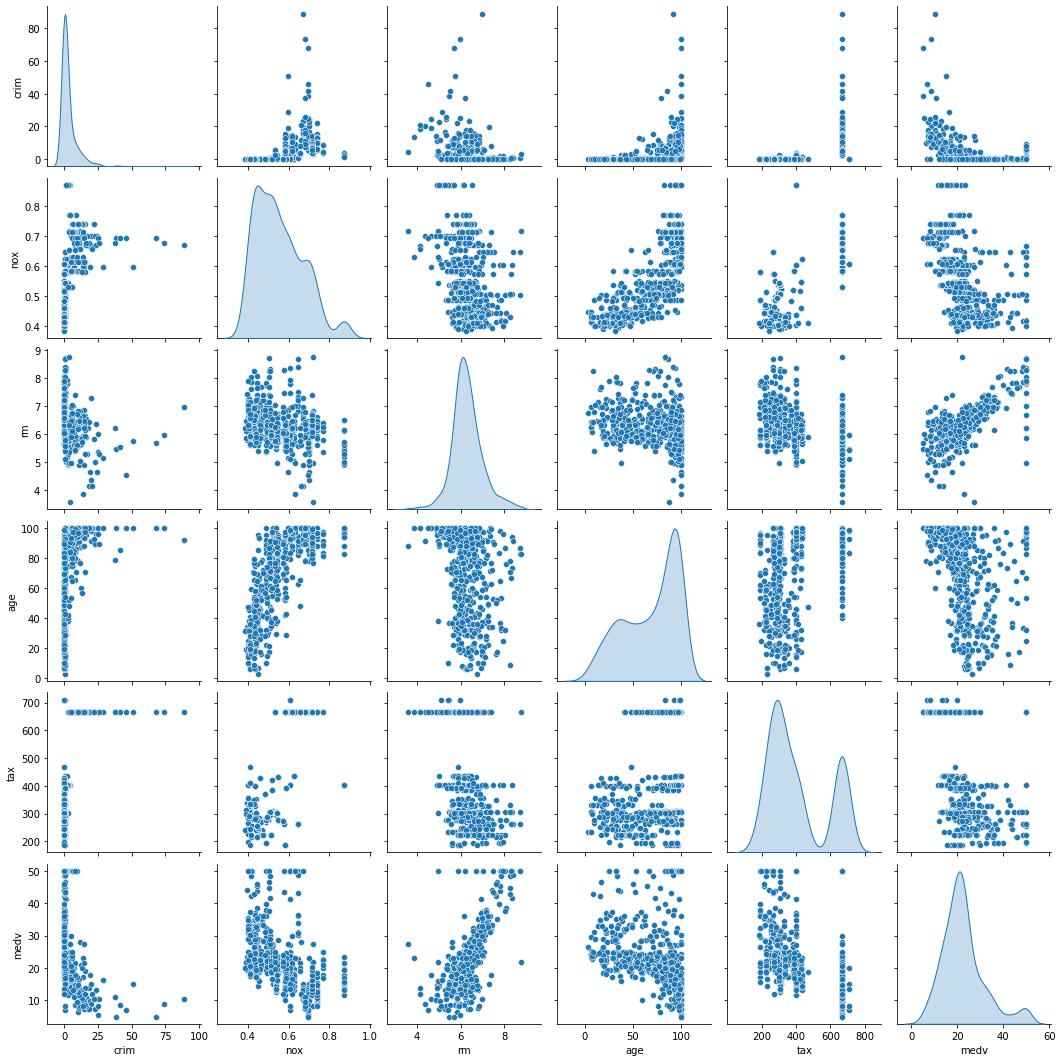

In [23]:
sns.pairplot(boston, diag_kind = 'kde')